In this notebook, I will look at the various steps of the process, as well as visualize results, first for the chrom20 sample run.

In [1]:
%run ../scripts/notebook_settings.py

Part 1: Mutation rate estimate

In [2]:
mut_rate_file = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/data/introgression_files/mutrate_chr20.txt"

In [3]:
mut_file = pd.read_csv(mut_rate_file, sep = "\t", names=["chrom", "start", "mutrate"])

In [4]:
mut_file

,chrom,start,mutrate
0,chr20,0,1.330865
1,chr20,1000,1.330865
2,chr20,2000,1.330865
3,chr20,3000,1.330865
4,chr20,4000,1.330865
...,...,...,...
72046,chr20,72046000,0.943443
72047,chr20,72047000,0.943443
72048,chr20,72048000,0.943443
72049,chr20,72049000,0.943443


In [5]:
mut_file.mutrate.mean()

1.001620437397349

Text(0.5, 1.0, 'chr20')

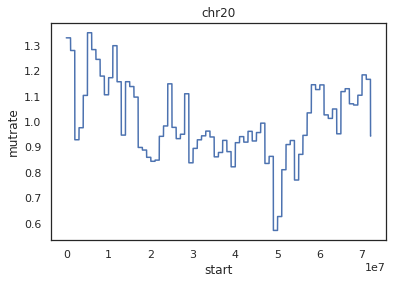

In [6]:
sns.lineplot(data=mut_file, x="start", y="mutrate").set_title("chr20")

Chr2

In [7]:
mut_rate_file = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/data/introgression_files/mutrate_chr2.txt"
mut_file = pd.read_csv(mut_rate_file, sep = "\t", names=["chrom", "start", "mutrate"])
mut_file.mutrate.mean()

1.0006108617826976

Text(0.5, 1.0, 'chr2')

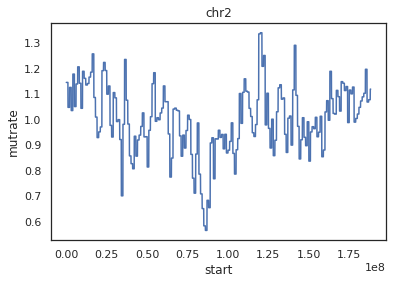

In [8]:
sns.lineplot(data=mut_file, x="start", y="mutrate").set_title("chr2")

Part 2: The weights (how much is callable)

In [9]:
chrom_weights_file = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/data/introgression_files/chr20_weights.txt"

In [10]:
weight_file = pd.read_csv(chrom_weights_file, sep = "\t", names=["chrom", "start", "weight"])

Text(0.5, 1.0, 'chr20')

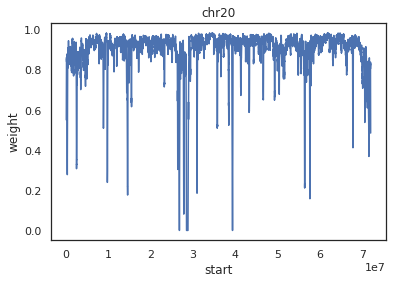

In [11]:
sns.lineplot(data=weight_file.rolling(window=100).mean()[99:], x="start", y="weight").set_title("chr20")

In [12]:
weight_file["weight"].mean()

0.8914262258677881

Chr2

Text(0.5, 1.0, 'chr2')

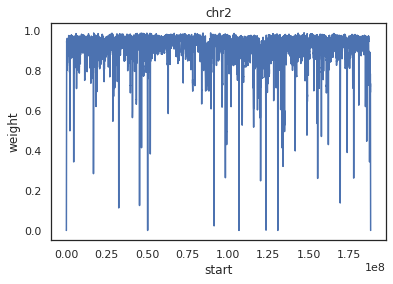

In [13]:
chrom_weights_file = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/data/introgression_files/chr2_weights.txt"
weight_file = pd.read_csv(chrom_weights_file, sep = "\t", names=["chrom", "start", "weight"])
sns.lineplot(data=weight_file.rolling(window=100).mean()[99:], x="start", y="weight").set_title("chr2")

Part 3: Private variants for PD_0390

In [14]:
obs_file = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/introgression_steps/chr20/PD_0390.chr20.observations.txt"

In [15]:
file1 = open(obs_file, 'r')
lines = file1.readlines()
lines[200].split("\t")
private_count = []
for line in lines:
    private_count.append(int(line.split("\t")[2]))

In [16]:
df_private = pd.DataFrame(private_count, columns=["private_variants"])
df_private["weight"] = weight_file["weight"]
df_private["start"] = weight_file["start"]

<AxesSubplot:xlabel='start', ylabel='private_variants'>

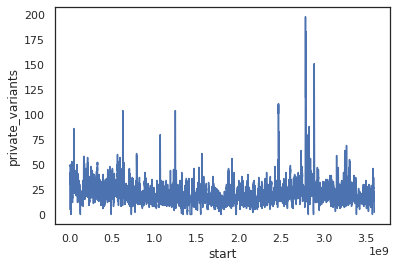

In [17]:
sns.lineplot(data=df_private.rolling(window=50).sum()[49:], x="start", y="private_variants")

In [18]:
comp_weight = []
for i, row in df_private.iterrows():
    if row.weight > 0:
        comp_weight.append(row.private_variants/row.weight)
    else:
        comp_weight.append(0)
df_private["weighted_variants"] = comp_weight

<AxesSubplot:xlabel='start', ylabel='weighted_variants'>

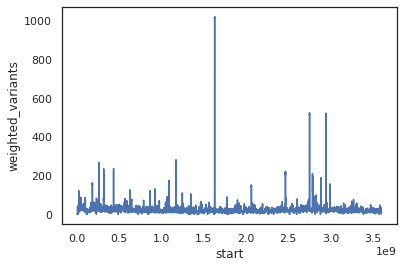

In [19]:
sns.lineplot(data=df_private.rolling(window=50).sum()[49:], x="start", y="weighted_variants")

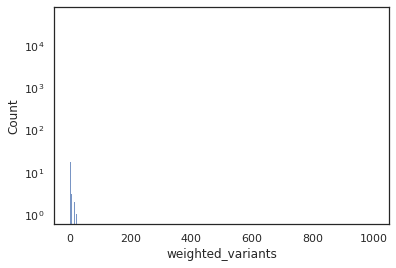

In [20]:
g = sns.histplot(df_private, x="weighted_variants")
g.set_yscale("log")

Adding a normalization for the inferred mutation rate

In [21]:
df_private["mutrate"] = mut_file["mutrate"]

In [22]:
df_private["weight_and_mutrate"] = df_private["weighted_variants"]/df_private["mutrate"]

Text(0.5, 1.0, 'chr20')

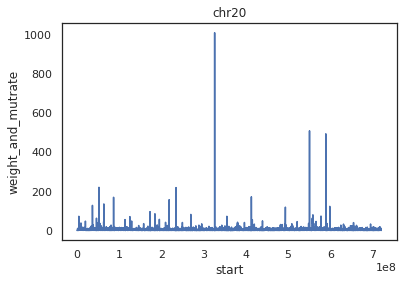

In [23]:
sns.lineplot(data=df_private.rolling(window=10).sum()[9:], x="start", y="weight_and_mutrate").set_title("chr20")

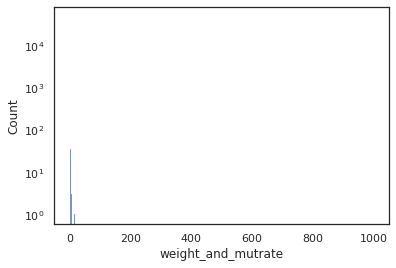

In [24]:
g = sns.histplot(df_private, x="weight_and_mutrate")
g.set_yscale("log")

Chr2

Text(0.5, 1.0, 'chr2')

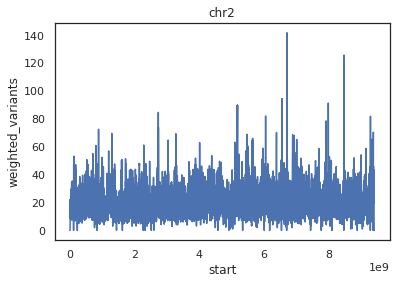

In [25]:
obs_file = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/introgression_steps/chr2/PD_0390.chr2.observations.txt"
file1 = open(obs_file, 'r')
lines = file1.readlines()
lines[200].split("\t")
private_count = []
for line in lines:
    private_count.append(int(line.split("\t")[2]))
df_private = pd.DataFrame(private_count, columns=["private_variants"])
df_private["weight"] = weight_file["weight"]
df_private["start"] = weight_file["start"]
comp_weight = []
for i, row in df_private.iterrows():
    if row.weight > 0:
        comp_weight.append(row.private_variants/row.weight)
    else:
        comp_weight.append(0)
df_private["weighted_variants"] = comp_weight
sns.lineplot(data=df_private.rolling(window=50).sum()[49:], x="start", y="weighted_variants").set_title("chr2")

Part 4: Model predictions for PD_0390

In [26]:
summary_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/introgression_steps/chr20/PD_0390_decoded.Summary.txt"

In [27]:
summary_file = pd.read_csv(summary_path, sep = "\t")

In [28]:
summary_file.loc[summary_file.state == "Archaic"].length.sum()/summary_file.length.sum()

0.023871979570026788

In [29]:
summary_file.loc[summary_file.state == "Baboon"].length.sum()/summary_file.length.sum()

0.9761280204299733

Also checking chr2

In [30]:
summary_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/introgression_steps/chr2/PD_0390_decoded.Summary.txt"

In [31]:
summary_file = pd.read_csv(summary_path, sep = "\t")

In [32]:
summary_file.loc[summary_file.state == "Archaic"].length.sum()/summary_file.length.sum()

0.15834059187185315

Text(0.5, 0, '1kb blocks')

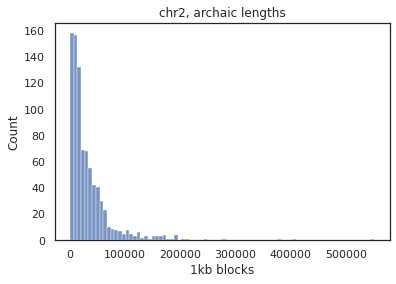

In [33]:
sns.histplot(data=summary_file.loc[summary_file.state == "Archaic"].length).set_title("chr2, archaic lengths")
plt.xlabel("1kb blocks")

In [34]:
summary_file.loc[summary_file.state == "Baboon"].length.sum()/summary_file.length.sum()

0.8416594081281469

In [35]:
summary_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis/introgression_steps/chr2/PD_0392_decoded.Summary.txt"

In [36]:
summary_file = pd.read_csv(summary_path, sep = "\t")
summary_file.loc[summary_file.state == "Archaic"].length.sum()/summary_file.length.sum()

0.16377387351022923